In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from IPython.display import HTML, display

In [3]:
df_git = pd.read_csv('../csv/500_github_final.csv')

# Replace '?' with NaN for numeric columns
df_git['Style Guide Adherence'] = pd.to_numeric(df_git['Style Guide Adherence'], errors='coerce')
df_git['Complexity Score'] = pd.to_numeric(df_git['Complexity Score'], errors='coerce')

# Fill missing values with the mean of the respective columns
df_git['Style Guide Adherence'] = df_git['Style Guide Adherence'].fillna(df_git['Style Guide Adherence'].mean())
df_git['Complexity Score'] = df_git['Complexity Score'].fillna(df_git['Complexity Score'].mean())

# Encode the categories
encoder = LabelEncoder()
df_git["Comment Ratio"] = encoder.fit_transform(df_git["Comment Ratio"])

# Round decimal values
df_git["Variable Name Quality"] = df_git["Variable Name Quality"].round(2)
df_git["Complexity Score"] = df_git["Complexity Score"].round(2)

np_git = df_git.to_numpy()

X_git = np_git[:, 1:6]
y_git_manual = np_git[:, -1]
y_git_programmatic = np_git[:, -2]


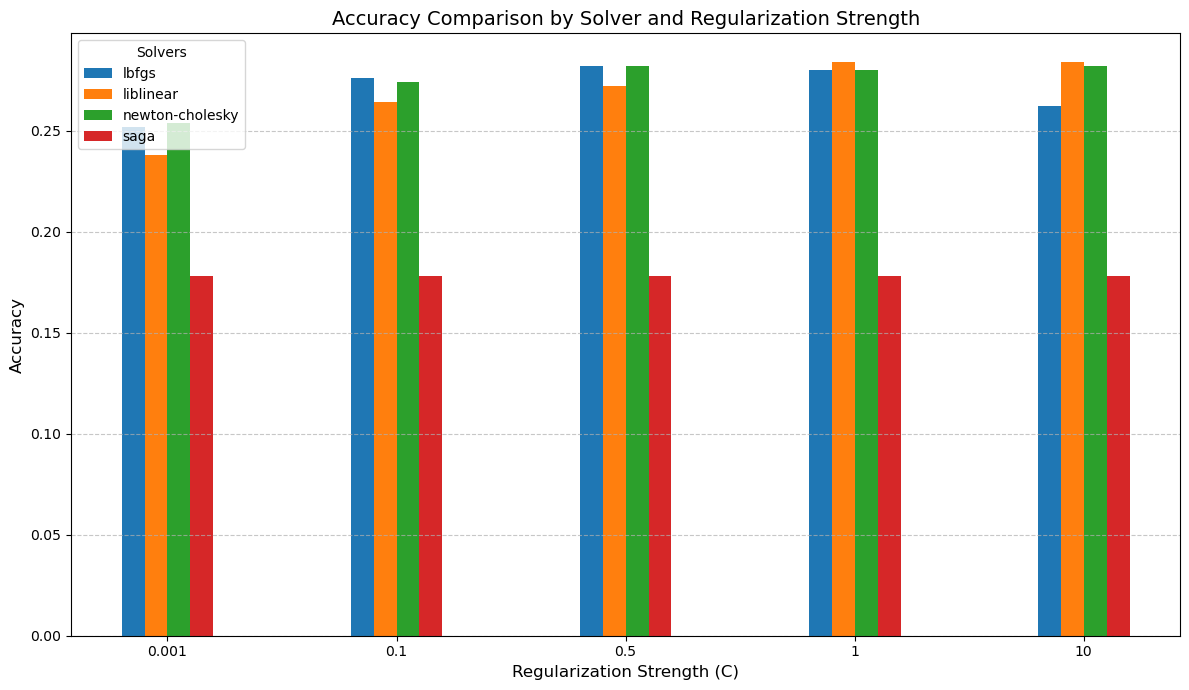

Solver,Average Number of Iterations for All Classes
lbfgs,[490.6]
liblinear,[21.4 17.2 16.6 28. 14.6]
newton-cholesky,[7.2 9. 9. 6. 9. ]
saga,[500.]


In [36]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

data = {}
table = []
solvers = ['lbfgs', 'liblinear', 'newton-cholesky', 'saga']
c_values = [0.001, 0.1, 0.5, 1, 10]
for s in solvers:
    data[s] = []
    num_iter = 0
    for c in c_values:
        
        clf = LogisticRegression(solver=s, C=c, warm_start=True,
                             random_state=42, class_weight=None,
                             max_iter=500)
    
        clf.fit(X_git, y_git_manual)
        data[s].append([c, cross_val_score(clf, X_git, y_git_manual, cv=5).mean()])
        num_iter += clf.n_iter_
    
    table.append([s, num_iter/len(c_values)])

accuracies = {solver: [entry[1] for entry in values] for solver, values in data.items()}

# Plot the data
fig, ax = plt.subplots(figsize=(12, 7))

# Create a bar plot for each solver
width = 0.1  # Bar width
x_pos = np.arange(len(c_values))  # X-axis positions for each C value

for i, solver in enumerate(solvers):
    ax.bar(x_pos + i * width, accuracies[solver], width, label=solver)

# Customize the plot
ax.grid(True, axis='y', linestyle='--', alpha=0.7)  # Horizontal grid lines
ax.set_xlabel('Regularization Strength (C)', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy Comparison by Solver and Regularization Strength', fontsize=14)
ax.set_xticks(x_pos + width * (len(solvers) - 1) / 2)
ax.set_xticklabels(c_values)
ax.legend(title="Solvers")

plt.tight_layout()
plt.show()

headers = ["Solver", "Average Number of Iterations for All Classes"]
display(HTML(tabulate(table, headers=headers, tablefmt='html')))

In [4]:
df_git = pd.read_csv('../csv/500_github_final.csv')

# Replace '?' with NaN for numeric columns
df_git['Style Guide Adherence'] = pd.to_numeric(df_git['Style Guide Adherence'], errors='coerce')
df_git['Complexity Score'] = pd.to_numeric(df_git['Complexity Score'], errors='coerce')

# Fill missing values with the mean of the respective columns
df_git['Style Guide Adherence'] = df_git['Style Guide Adherence'].fillna(df_git['Style Guide Adherence'].mean())
df_git['Complexity Score'] = df_git['Complexity Score'].fillna(df_git['Complexity Score'].mean())

# Encode the categories
encoder = LabelEncoder()
df_git["Comment Ratio"] = encoder.fit_transform(df_git["Comment Ratio"])

# Round decimal values
df_git["Variable Name Quality"] = df_git["Variable Name Quality"].round(2)
df_git["Complexity Score"] = df_git["Complexity Score"].round(2)

TARGET = 'Readability Manual'
df_git[TARGET] = df_git[TARGET].replace({0: 0, 1: 0, 2: 1, 3: 2, 4: 2})

np_git = df_git.to_numpy()

X_git = np_git[:, 1:6]
y_git_manual = np_git[:, -1]
y_git_programmatic = np_git[:, -2]


In [5]:
df_pypi = pd.read_csv('../csv/code_pypi_readability_complete.csv')

# Replace '?' with NaN for numeric columns
df_pypi['Style Guide Adherence'] = pd.to_numeric(df_pypi['Style Guide Adherence'], errors='coerce')
df_pypi['Complexity Score'] = pd.to_numeric(df_pypi['Complexity Score'], errors='coerce')

# Fill missing values with the mean of the respective columns
df_pypi['Style Guide Adherence'] = df_pypi['Style Guide Adherence'].fillna(df_pypi['Style Guide Adherence'].mean())
df_pypi['Complexity Score'] = df_pypi['Complexity Score'].fillna(df_pypi['Complexity Score'].mean())

# Encode the categories
encoder = LabelEncoder()
df_pypi["Comment Ratio"] = encoder.fit_transform(df_pypi["Comment Ratio"])

# Round decimal values
df_pypi["Variable Name Quality"] = df_pypi["Variable Name Quality"].round(2)
df_pypi["Complexity Score"] = df_pypi["Complexity Score"].round(2)

TARGET = 'Readability Category'
df_pypi[TARGET] = df_pypi[TARGET].replace({0: 0, 1: 0, 2: 1, 3: 2, 4: 2})

np_pypi = df_pypi.to_numpy()

X_pypi = np_pypi[:, 1:6]
y_pypi_manual = np_pypi[:, -1]
y_pypi_programmatic = np_pypi[:, -2]


In [7]:
table = []
regularization_strength = [0.001, 0.01, 0.05, 0.1, 0.5, 1]
for c in regularization_strength:
    X_train, X_test, y_train, y_test = train_test_split(X_pypi, y_pypi_manual, train_size=0.75)
        
    clf = LogisticRegression(solver='liblinear', C=c,
                         random_state=42, class_weight=None,
                         max_iter=1000)
    
    clf.fit(X_train, y_train)
    
    table.append([c, clf.n_iter_, clf.score(X_train, y_train), clf.score(X_test, y_test)]) 

headers = ["Regularization Strength", "Number of Epochs", "Training Accuracy", "Test Accuracy"]
display(HTML(tabulate(table, headers=headers, tablefmt='html')))


Regularization Strength,Number of Epochs,Training Accuracy,Test Accuracy
0.001,[7 6 3],0.622995,0.64
0.01,[9 7 4],0.663102,0.672
0.05,[10 9 8],0.665775,0.68
0.1,[10 9 8],0.679144,0.648
0.5,[13 10 11],0.673797,0.672
1,[12 12 12],0.671123,0.648


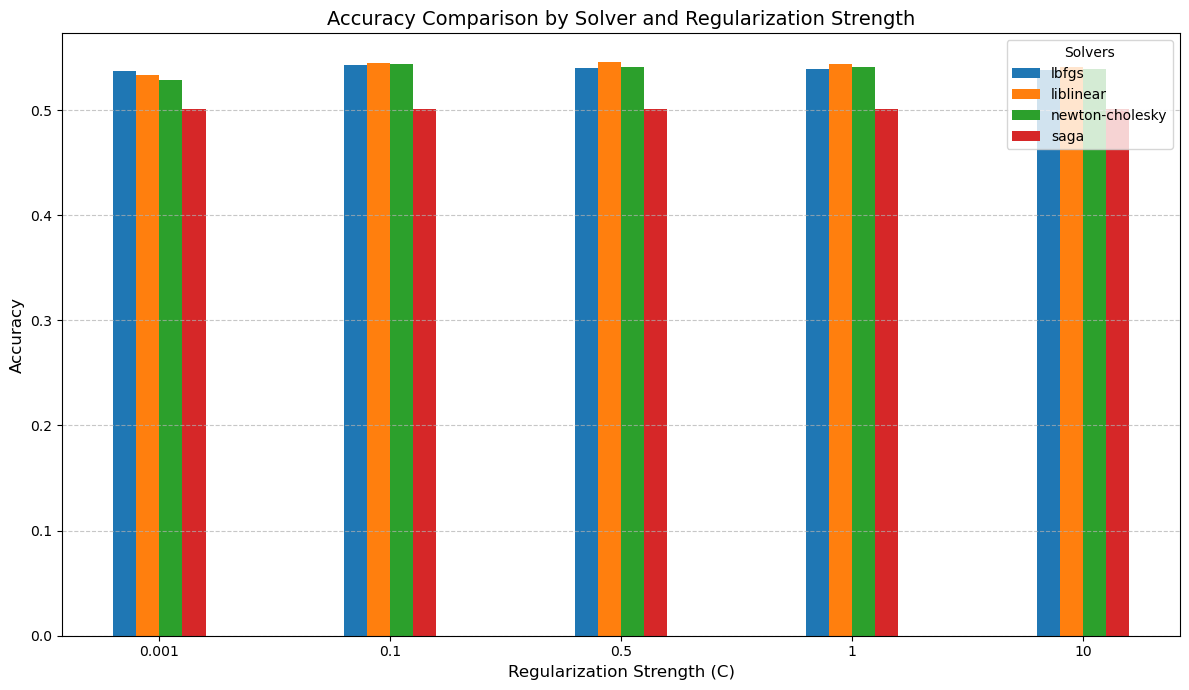

Solver,Average Number of Iterations for All Classes
lbfgs,[391.2]
liblinear,[11.4 16.8 25. ]
newton-cholesky,[7.2 8. 7. ]
saga,[500.]


In [46]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

X = X_git.tolist() + X_pypi.tolist()
y = y_git_manual.tolist() + y_pypi_manual.tolist()

data = {}
table = []
solvers = ['lbfgs', 'liblinear', 'newton-cholesky', 'saga']
c_values = [0.001, 0.1, 0.5, 1, 10]
for s in solvers:
    data[s] = []
    num_iter = 0
    for c in c_values:
        
        clf = LogisticRegression(solver=s, C=c,
                             random_state=42, class_weight=None,
                             max_iter=500)
    
        clf.fit(X, y)
        data[s].append([c, cross_val_score(clf, X, y, cv=5).mean()])
        num_iter += clf.n_iter_
    
    table.append([s, num_iter/len(c_values)])

accuracies = {solver: [entry[1] for entry in values] for solver, values in data.items()}

# Plot the data
fig, ax = plt.subplots(figsize=(12, 7))

# Create a bar plot for each solver
width = 0.1  # Bar width
x_pos = np.arange(len(c_values))  # X-axis positions for each C value

for i, solver in enumerate(solvers):
    ax.bar(x_pos + i * width, accuracies[solver], width, label=solver)

# Customize the plot
ax.grid(True, axis='y', linestyle='--', alpha=0.7)  # Horizontal grid lines
ax.set_xlabel('Regularization Strength (C)', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy Comparison by Solver and Regularization Strength', fontsize=14)
ax.set_xticks(x_pos + width * (len(solvers) - 1) / 2)
ax.set_xticklabels(c_values)
ax.legend(title="Solvers")

plt.tight_layout()
plt.show()

headers = ["Solver", "Average Number of Iterations for All Classes"]
display(HTML(tabulate(table, headers=headers, tablefmt='html')))


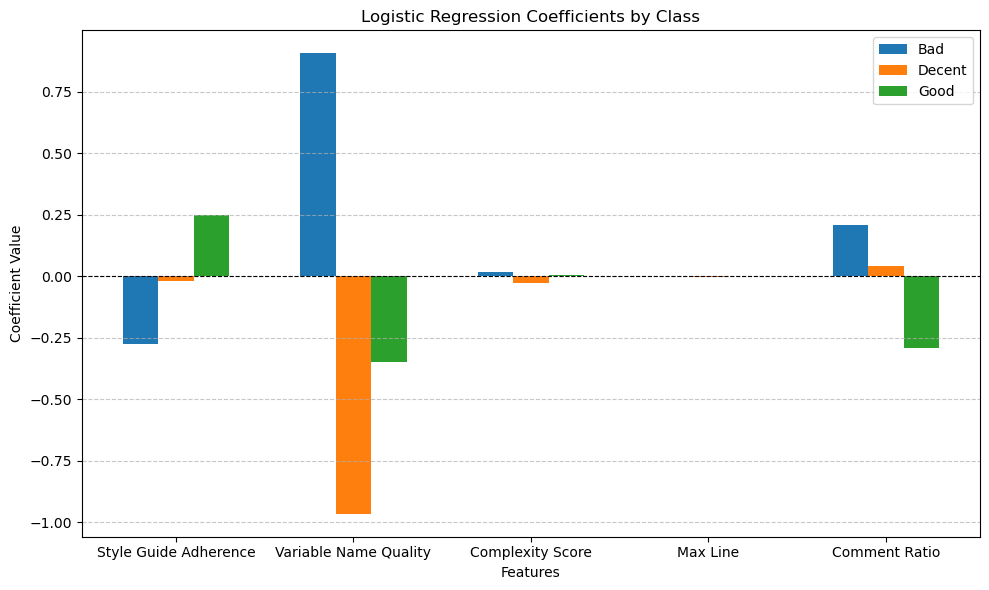

In [54]:
clf = LogisticRegression(solver='liblinear', C=1,
                             random_state=42, class_weight=None,
                             max_iter=1000)
clf.fit(X, y)

coefficients = clf.coef_

# Labels
classes = ['Bad', 'Decent', 'Good']  # Rows represent classes
features = ['Style Guide Adherence', 'Variable Name Quality', 'Complexity Score', 'Max Line', 'Comment Ratio']

# Bar graph setup
x = np.arange(len(features))  # Number of features
width = 0.2  # Bar width
offsets = [-width, 0, width]  # For grouping bars by class

# Create the bar graph
plt.figure(figsize=(10, 6))

for i, row in enumerate(coefficients):
    plt.bar(x + offsets[i], row, width, label=classes[i])

# Add labels, title, and legend
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients by Class')
plt.xticks(x, features)  # Set x-axis tick labels
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Horizontal line at y=0
plt.legend()

# Show the graph
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
